Clasificación de las imágenes.

The problem: clasificación del dataset MNIST
- clasificación en escala de grises
- dígitos handwritten
- 28x28px
- 10 categorías (0-9)

In [27]:
# tensorflow low level library
# keras high level library
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# importamos el dataset
from tensorflow.keras.datasets import mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Observamos el tipo de dato
type(train_images)

numpy.ndarray

In [5]:
train_images.shape

(60000, 28, 28)

In [37]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

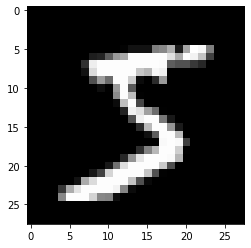

In [7]:
plt.imshow(train_images[0], cmap='gray')

In [8]:
train_labels[0]

5

In [11]:
# Imágenes en formato 28x28 pixel en formato matrices
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
# Imágenes etiquetadas
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

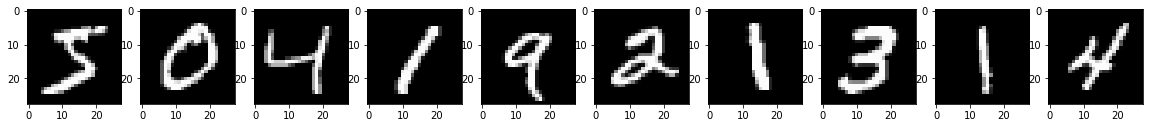

In [13]:
# explorando las 10 imágenes
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20,20))
for i in range(n_images):
  axs[i].imshow(train_images[i], cmap='gray')

In [14]:
# explorando las 10 etiquetas
train_labels[:n_images]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Entrenando un modelo clásico de ML

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
train_images[0].shape

(28, 28)

In [17]:
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
train_images[0].shape

(28, 28)

In [20]:
X_train.shape

(60000, 784)

In [21]:
X_train[0].shape

(784,)

In [22]:
# training
model = GradientBoostingClassifier(n_estimators=10,
                                   max_depth=5,
                                   max_features=0.1)

In [23]:
model.fit(X_train, train_labels)

GradientBoostingClassifier(max_depth=5, max_features=0.1, n_estimators=10)

In [24]:
# predicting
model.predict(X_test[:10])

array([7, 2, 1, 0, 4, 1, 4, 4, 5, 9], dtype=uint8)

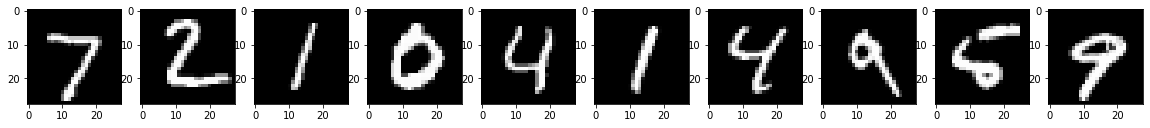

In [26]:
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20,20))
for i in range(n_images):
  axs[i].imshow(test_images[i], cmap='gray')

In [27]:
# explorando las 10 etiquetas
test_labels[:n_images]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [29]:
# Realizamos el check de los errores
import numpy as np
error_indices = np.argwhere(test_labels[:1000] != model.predict(X_test[:1000]))

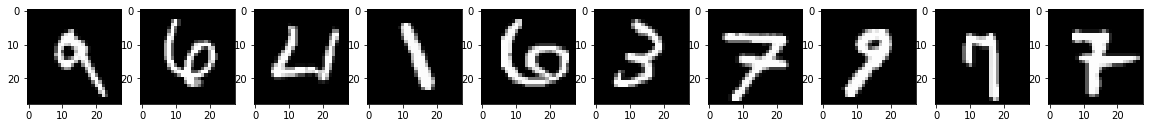

In [31]:
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20,20))
for i, index in zip(range(n_images), error_indices):
  axs[i].imshow(test_images[index][0], cmap='gray')

In [34]:
for i in error_indices[:10]:
  print(model.predict(X_test[i].reshape(1,-1)))

[4]
[4]
[0]
[3]
[2]
[2]
[9]
[7]
[9]
[8]


In [35]:
# Accuracy Score
model.score(X_train, train_labels)

0.91245

In [36]:
# aplicando el score en los valores de test
model.score(X_test, test_labels)

0.9085

# Aplicando las ANN (Artificial Neural Network)

Seguimos el workflow:
- primero creamos el modelo con los datos de training (images, labels)
- la red neuronal aprenderá de las imagénes y etiquetas
- finalmente, creamos la predicción para los test_images
- verificamos con las predicciones nuestras test_labels

In [6]:
# creamos nuestra red
network = models.Sequential()

# Construimos las capas

- dos capas Dense layer, que estarán *densely-connected* (también 'fully-connected').
- Una de las capas tendrá 10 salidas con la función 'softmax'
- esta última devolverá un array de 10 scoring (sumando hará 1).
- cada puntuacuón será la probabilidad de que el dígito real se encuentre entre las 10 clases.

In [7]:
network.add(layers.Dense(256, activation='relu', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))

In [8]:
# compilamos
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

- necesitamos realizar el reshape de cada una de los 28x28 img a un vector de 784
- escalar los valores en un intervalo [0, 1]

In [9]:
train_vectors = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_vectors = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

In [10]:
train_vectors.shape

(60000, 784)

In [11]:
# también necesitamos transformar las etiquetas en categóricas
from tensorflow.keras.utils import to_categorical

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
train_labels_hot = to_categorical(train_labels)
test_labels_hot = to_categorical(test_labels)

In [14]:
train_labels_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
# comprobamos la transformación a categórica
train_labels[10]

3

In [16]:
train_labels_hot[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
# resumen de nuestra red neuronal
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [18]:
%%time
network.fit(train_vectors, train_labels_hot,
            epochs=15, batch_size=128,
            validation_split=0.1)
# no GPU - 42.6 sec

Epoch 1/15
422/422 [==============================] - 4s 5ms/step - loss: 0.3056 - accuracy: 0.9139 - val_loss: 0.1389 - val_accuracy: 0.9597
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1361 - accuracy: 0.9599 - val_loss: 0.0953 - val_accuracy: 0.9722
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0922 - accuracy: 0.9730 - val_loss: 0.0834 - val_accuracy: 0.9758
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0692 - accuracy: 0.9790 - val_loss: 0.0780 - val_accuracy: 0.9767
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0533 - accuracy: 0.9843 - val_loss: 0.0764 - val_accuracy: 0.9798
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0430 - accuracy: 0.9871 - val_loss: 0.0769 - val_accuracy: 0.9783
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0346 - accuracy: 0.9899 - val_loss: 0.0725 - val_accuracy: 0.9797
Epoch 

In [19]:
%%time
network.fit(train_vectors, train_labels_hot,
            epochs=15, batch_size=128,
            validation_split=0.1)
# with GPU - 29.6s

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.0852 - val_accuracy: 0.9815
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0926 - val_accuracy: 0.9805
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.1016 - val_accuracy: 0.9798
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0983 - val_accuracy: 0.9827
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0938 - val_accuracy: 0.9818
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0976 - val_accuracy: 0.9830
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.1083 - val_accuracy: 0.9827
Epoch 

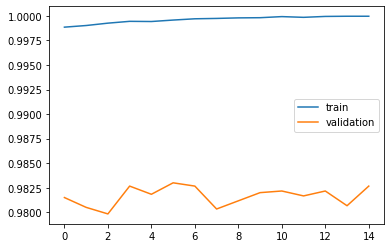

In [21]:
plt.plot(network.history.history['accuracy'], label='train')
plt.plot(network.history.history['val_accuracy'], label='validation')
plt.legend()

In [22]:
_, test_acc = network.evaluate(test_vectors, test_labels_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.1168 - accuracy: 0.9818


In [23]:
test_acc

0.9818000197410583

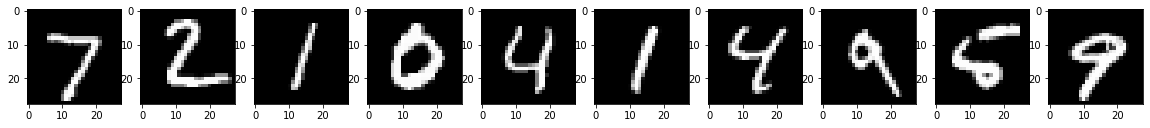

In [24]:
# comprobaciones
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20,20))
for i in range(n_images):
  axs[i].imshow(test_images[i], cmap='gray')

In [25]:
test_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [28]:
np.argmax(network.predict(test_vectors), axis=-1)[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [30]:
# Comprobación de los errores
errores_indices = np.argwhere(test_labels[:1000] != np.argmax(network.predict(test_vectors), axis=-1)[:1000]).flatten()

In [31]:
errores_indices

array([115, 247, 321, 340, 445, 582, 619, 659, 684, 691, 720, 900, 947,
       951, 965])

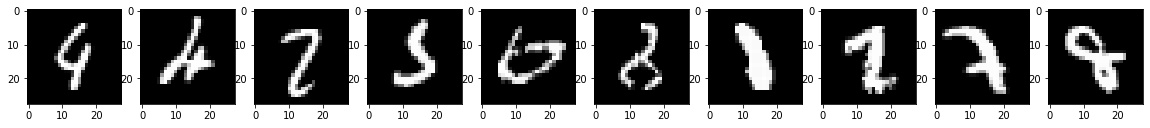

In [34]:
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20,20))
for i, index in zip(range(n_images), errores_indices):
  axs[i].imshow(test_images[index], cmap='gray')

In [35]:
test_labels[errores_indices][:10]

array([4, 4, 2, 5, 6, 8, 1, 2, 7, 8], dtype=uint8)

In [36]:
np.argmax(network.predict(test_vectors[errores_indices]), axis=-1)[:10]

array([9, 2, 7, 3, 0, 2, 8, 1, 3, 4])

# CNN - Convolutional neural network

In [37]:
model = models.Sequential()

In [39]:
# creamos las capas ocultas
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [40]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [42]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [43]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
train_images.shape

(60000, 28, 28, 1)

In [48]:
train_labels_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [49]:
model.fit(train_images, train_labels_hot, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10


TypeError: ignored